In [56]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [57]:
df = pd.read_csv("insurance.csv")
df = df.dropna()
df = pd.get_dummies(df,drop_first=True)

In [58]:
df.shape
df.isnull()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               200 non-null    int64  
 1   bmi               200 non-null    float64
 2   children          200 non-null    int64  
 3   charges           200 non-null    float64
 4   sex_male          200 non-null    bool   
 5   smoker_yes        200 non-null    bool   
 6   region_northwest  200 non-null    bool   
 7   region_southeast  200 non-null    bool   
 8   region_southwest  200 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 7.4 KB


<Axes: xlabel='age', ylabel='charges'>

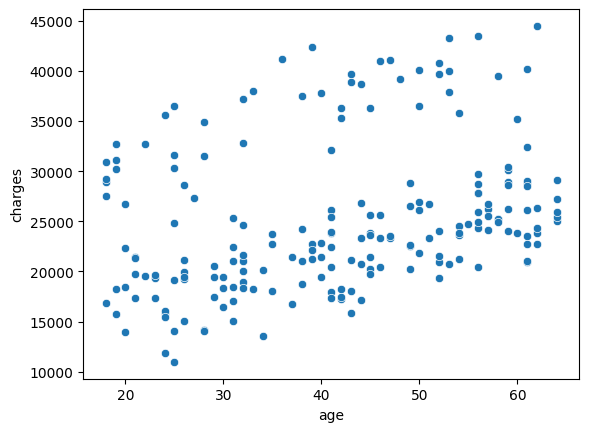

In [59]:
sns.scatterplot(x="age",y="charges",data=df)

<Axes: xlabel='age', ylabel='charges'>

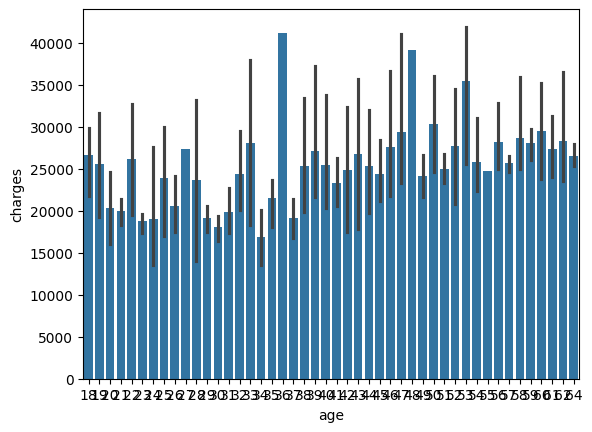

In [60]:
sns.barplot(x="age",y="charges",data=df)

<Axes: xlabel='age', ylabel='charges'>

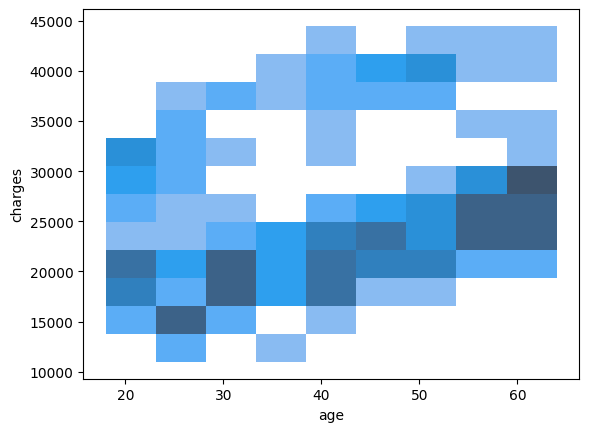

In [61]:
sns.histplot(x="age",y="charges",data=df)

In [62]:
X = df.drop("charges",axis=1)
Y=df["charges"]

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [65]:
y_pred = lr.predict(X_test)



In [66]:
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
print("R2 score",r2_score(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))

R2 score 0.9047863282462034
MSE 4867053.724931754


In [68]:
result = pd.DataFrame({"Actual":Y_test,"Predict":y_pred})

In [55]:
print(result.head())

       Actual       Predict
95   16008.08  19513.679345
15   22352.91  19080.224122
30   28971.73  28547.522283
158  39985.23  41043.884922
128  16822.80  12547.413881


In [71]:
with open('model.pkl','wb') as file:
  pickle.dump(lr,file)